[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

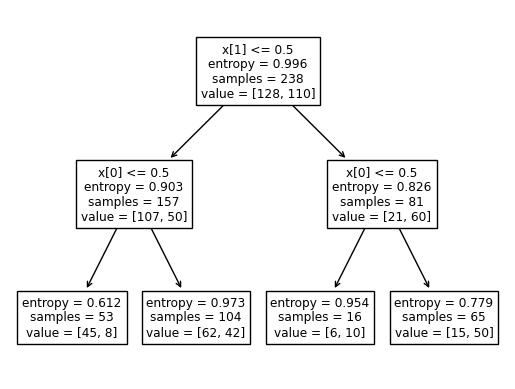

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

data = pd.read_csv('/content/drive/MyDrive/BigData/train_data_tree.csv')

X = data[['sex', 'exang']]
y = data[['num']]

clf = tree.DecisionTreeClassifier(criterion = 'entropy')

clf.fit(X, y)

tree.plot_tree(clf)



In [3]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

clf.predict(X_test)

array([0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1])

[Text(0.3333333333333333, 0.875, 'x[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [41, 34, 37]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.499\nsamples = 71\nvalue = [0, 34, 37]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 5.05\ngini = 0.176\nsamples = 41\nvalue = [0, 4, 37]'),
 Text(0.5, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [0, 4, 7]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

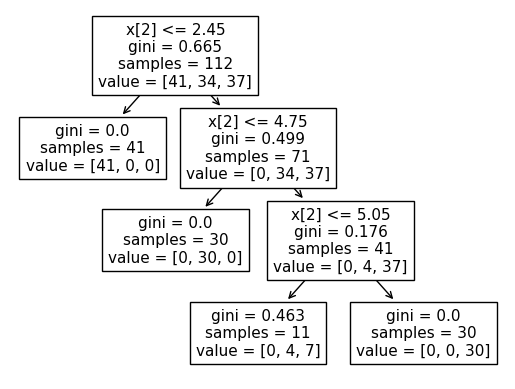

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import GridSearchCV
parametrs={'max_depth': range(1, 10), 'min_samples_split' : range(2,10), 'min_samples_leaf' : range(1,10)}
clf=DecisionTreeClassifier()

search=GridSearchCV(clf, parametrs)
search.fit(X, y)
search.best_params_

best_tree = search.best_estimator_

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

parametrs={'max_depth': range(1, 10), 'min_samples_split' : range(2,10), 'min_samples_leaf' : range(1,10)}
clf=DecisionTreeClassifier()

search=RandomizedSearchCV(clf, parametrs)
search.fit(X, y)
search.best_params_

best_tree = search.best_estimator_